In [2]:
from action_reps_control import ActionableRep
import torch
from torch import Tensor
import matplotlib.pyplot as plt

/home/tomas/code/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tomas/code/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tomas/code/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tomas/code/thesis/env/lib/python3.6/site-packages/tensorflow/

In [3]:
phi = ActionableRep(2)
phi.load_state_dict(torch.load("arc.pt"))
phi.eval()

ActionableRep(
  (l1): Linear(in_features=2, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=2, bias=True)
)

In [4]:
xlims, ylims = phi(Tensor([[-1, -1], [1, 1]])).T.detach()

<IPython.core.display.Javascript object>


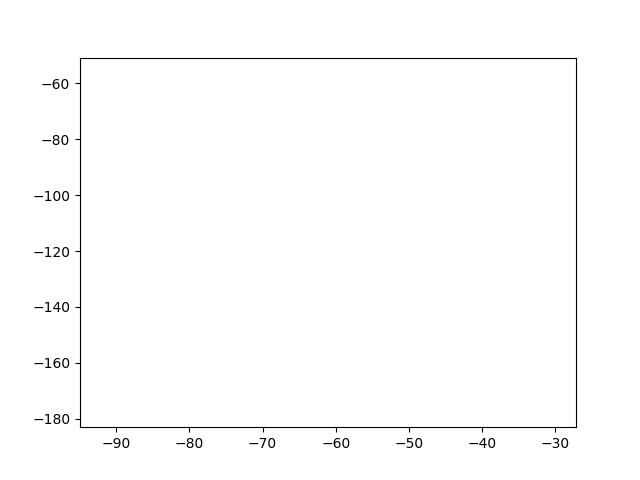

interactive(children=(FloatSlider(value=0.0, description='x1', max=1.0, min=-1.0, step=0.01), FloatSlider(valu…

In [5]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
num_pts = 20
line = ax.scatter([1]*num_pts, [1]*num_pts)
plt.xlim(sorted(xlims)); plt.ylim(sorted(ylims))


def update(x1 = (-1.0, 1.0, 0.01), x2 = (-1.0, 1.0, 0.01)):
    noisy_x = torch.randn(num_pts, 2)*0.05 + Tensor([x1, x2])
    o = phi(noisy_x).detach()
    line.set_offsets(o)
    fig.canvas.draw_idle()

interact(update);

In [6]:
def phi_dist(pos1, pos2):
    return torch.dist(*phi(Tensor([pos1, pos2])).detach())

In [9]:
p1 = np.array([-.75, -.5])
space = np.linspace(-1, 1, 100)
space2d = np.array([[i, j] for i in space for j in space])
dists = [phi_dist(p1, p2) for p2 in space2d]

<IPython.core.display.Javascript object>


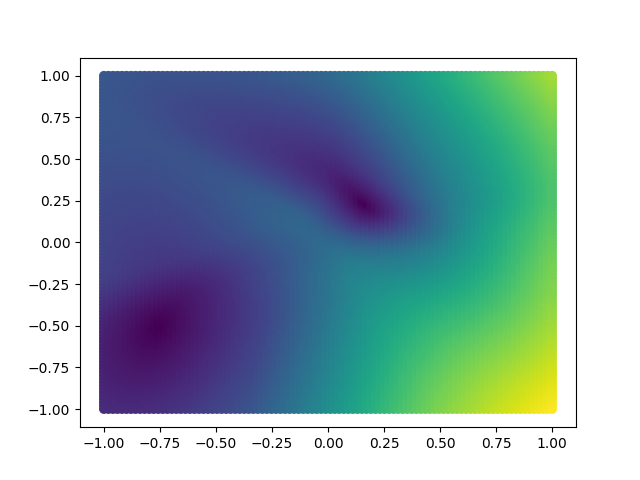

In [10]:
plt.scatter(*space2d.T, c=dists, cmap="viridis")
plt.show()